In [8]:
import math
import time
import collections

import gym
import numpy as np
import retro
from stable_baselines3.common.type_aliases import GymStepReturn
from matplotlib import pyplot as plt
  
from gym import Env
from gym.spaces import Box, MultiBinary

import cv2
class MarioImageWrapper(Env):
    def __init__(self):
        super().__init__()
        self.observation_space = Box(low=0, high=255, shape=(84, 84, 1), dtype=np.uint8)
        self.action_space = MultiBinary(36)
        self.game = retro.make('SuperMarioBros-Nes', 'Level1-1', use_restricted_actions=retro.Actions.FILTERED)
        self.last_coins = 0
        self.last_lives = 2
        self.custom_reward = 0
        self.last_xscrollLo = 0

    def my_reward(self, reward, info):
    
        coins = info['coins']
        lives = info['lives']
        xscrollLo = info['xscrollLo']
        if xscrollLo > self.last_xscrollLo:
            reward += xscrollLo * 10
        # if coins > self.last_coins:
        #     reward += (coins - self.last_coins)
    
        # if self.last_lives > lives:
        #     reward -= (self.last_lives - lives) * 10
    
        self.last_coins = coins
        self.last_lives = lives
        self.last_xscrollLo = xscrollLo
        if reward > 100:
            print('<<<<' + str(reward) + '>>>>>>')
            # time.sleep(5)
    
        return reward
    def step(self, action):
        obs, reward, done, info = self.game.step(action)
        obs = self.preprocess(obs)
        
        # Preprocess frame from game
        frame_delta = obs
        
        # # Frame delta
        # frame_delta = obs - self.previous_frame
        # self.previous_frame = obs

        # Shape reward
        
        reward = self.my_reward(reward,info)
        
        return frame_delta, reward, done, info
    
    def render(self, *args, **kwargs):
        self.game.render()
    
    def reset(self):
        self.previous_frame = np.zeros(self.game.observation_space.shape)
        
        # Frame delta
        obs = self.game.reset()
        obs = self.preprocess(obs)
        self.previous_frame = obs
        
        # Create initial variables
        self.score = 0
        
        return obs
    
    def preprocess(self, observation):
        gray = cv2.cvtColor(observation, cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (84, 84), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize, (84, 84, 1))
        return state
    
    def close(self):
        self.game.close()

In [9]:
env=MarioImageWrapper()

In [3]:
env.observation_space.shape

(84, 84, 1)

In [4]:
env.action_space.shape

(36,)

In [5]:
# obs = env.reset()
# # Set flag to flase
# done = False
# for game in range(1):
#     while not done:
#         if done:
#             obs = env.reset()
#         env.render()
#         obs, reward, done, info = env.step(env.action_space.sample())
#         time.sleep(0.01)
#         if reward > 0:
#             print(reward)

11.0
21.0
31.0
41.0
51.0
61.0
71.0
81.0
91.0
<<<<101.0>>>>>>
101.0
<<<<111.0>>>>>>
111.0
<<<<121.0>>>>>>
121.0
<<<<131.0>>>>>>
131.0
<<<<141.0>>>>>>
141.0
<<<<151.0>>>>>>
151.0
<<<<161.0>>>>>>
161.0
<<<<171.0>>>>>>
171.0
<<<<181.0>>>>>>
181.0
<<<<191.0>>>>>>
191.0
<<<<201.0>>>>>>
201.0
<<<<211.0>>>>>>
211.0
<<<<221.0>>>>>>
221.0
<<<<231.0>>>>>>
231.0
<<<<241.0>>>>>>
241.0
<<<<251.0>>>>>>
251.0
<<<<261.0>>>>>>
261.0
<<<<271.0>>>>>>
271.0
<<<<281.0>>>>>>
281.0
<<<<291.0>>>>>>
291.0
<<<<301.0>>>>>>
301.0
<<<<311.0>>>>>>
311.0
<<<<321.0>>>>>>
321.0
<<<<331.0>>>>>>
331.0
<<<<341.0>>>>>>
341.0
<<<<351.0>>>>>>
351.0
<<<<361.0>>>>>>
361.0
<<<<371.0>>>>>>
371.0
<<<<381.0>>>>>>
381.0
<<<<391.0>>>>>>
391.0
<<<<401.0>>>>>>
401.0
<<<<411.0>>>>>>
411.0
<<<<421.0>>>>>>
421.0
<<<<431.0>>>>>>
431.0
<<<<441.0>>>>>>
441.0
<<<<451.0>>>>>>
451.0
<<<<461.0>>>>>>
461.0
<<<<471.0>>>>>>
471.0
<<<<481.0>>>>>>
481.0
<<<<491.0>>>>>>
491.0
<<<<501.0>>>>>>
501.0
<<<<511.0>>>>>>
511.0
<<<<521.0>>>>>>
521.0
<<<<531.0

KeyboardInterrupt: 

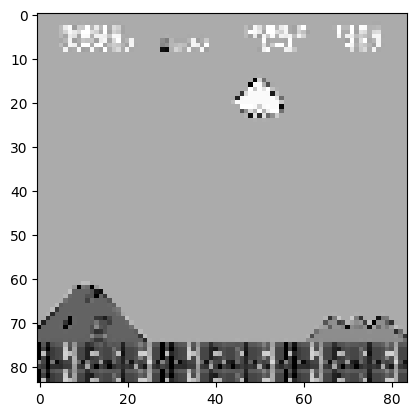

In [14]:
# obs = env.close()

obs = env.reset()
obs, reward, done, info = env.step(env.action_space.sample())
plt.imshow(cv2.cvtColor(obs, cv2.COLOR_BGR2RGB))